In [2]:
####1.订单表的长度,shape,columns
####2.统计菜品的平均价格（在amount列）
####3.什么菜最受欢迎
####4.哪个订单id点的最多，吃的最多，花的钱最多  
####...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#加中文 黑体
%matplotlib inline 
#在行内绘制图形
#1 加载数据
data1 = pd.read_excel('/data-mining/mael_order_detail.xlsx',sheet_name = 'meal_order_detail1')
data2 = pd.read_excel('/data-mining/mael_order_detail.xlsx',sheet_name = 'meal_order_detail2')
data3 = pd.read_excel('/data-mining/mael_order_detail.xlsx',sheet_name = 'meal_order_detail3')

#2 数据处理（合并三个数据，N/A处理），分析数据
data = pd.concat([data1,data2,data3],axis = 0) #unit three data
#axis = 0 是行 axis = 1 是列

data.dropna(axis =1,inplace = True)#delet N/A column, inplace修改原数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [4]:
#统计卖出菜品的平均价格
round(data['amounts'].mean(),2)#方法1 用pandas自带函数
round(np.mean(data['amounts']),2)#方法2 用numpy函数处理

44.82

dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: count, dtype: int64
0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


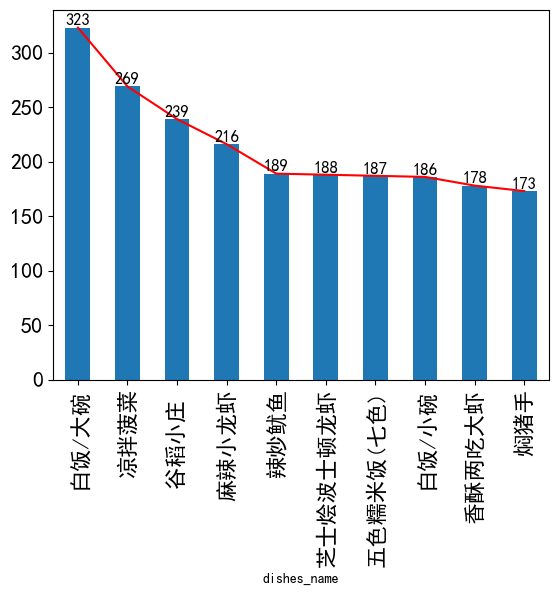

In [2]:
#频数统计，什么菜最受欢迎（对菜名进行频数统计，取最大的top10）
dishes_top10 = data['dishes_name'].value_counts().head(10)
print(dishes_top10)
#3 数据的可视化matplotlib
dishes_top10.plot(kind = 'line',color=['r'])#加颜色
dishes_top10.plot(kind = 'bar',fontsize=16)#改变字体大小

#加上文字
for x,y in enumerate (dishes_top10):
    print(x,y)    
    plt.text(x,y+2,y,ha = 'center',fontsize= 12) # type: ignore

 

Text(0, 0.5, 'type_of_order')

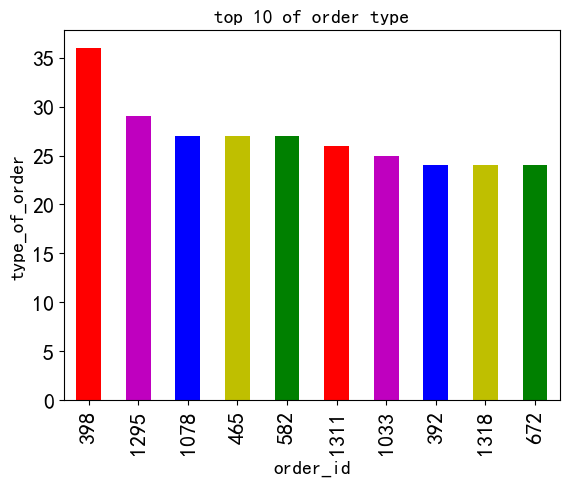

In [6]:
#那个订单种类最多
data_group  = data['order_id'].value_counts().head(10)
data_group.plot(kind = 'bar',fontsize=16,color=['r','m','b','y','g'])
plt.title('top 10 of order type',fontsize=14)
plt.xlabel('order_id',fontsize=14)
plt.ylabel('type_of_order',fontsize=14)

#8月份餐厅订单啊点菜种类前十名，平均点菜25个菜品

Text(0.5, 1.0, 'the relationship of order_id and number_of_dishes')

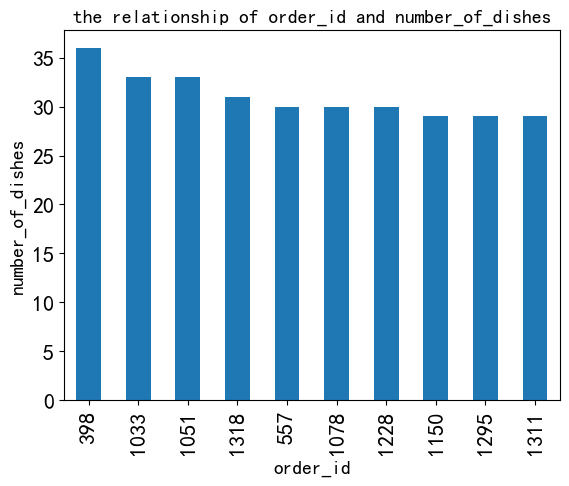

In [7]:
#那个订单id点菜价格最贵
data['total_amounts'] = data['counts']*data['amounts']
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby('order_id')

Group_sum = dataGroup.sum()#分组求和

sort_counts = Group_sum.sort_values(by = 'counts',ascending = False).head(10)#订单菜品数量最多的
sort_counts ['counts'].head(10).plot(kind = 'bar',fontsize=16)
plt.xlabel('order_id',fontsize=14)
plt.ylabel('number_of_dishes',fontsize=14)
plt.title('the relationship of order_id and number_of_dishes',fontsize=14)
#8月点菜数量前十名

Text(0, 0.5, 'total_payment')

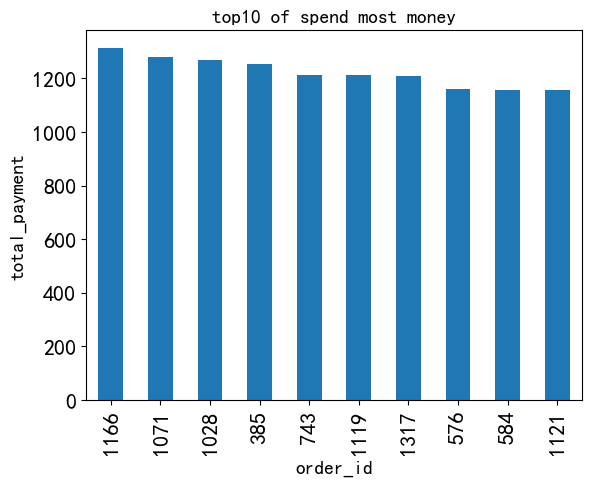

In [8]:
#订单ID吃的钱最多
sort_total_amounts=Group_sum.sort_values(by = 'total_amounts',ascending = False).head(10)
#print(sort_total_amounts)
sort_total_amounts['total_amounts'].plot(kind = 'bar',fontsize=16)

plt.title('top10 of spend most money',fontsize=14)
plt.xlabel('order_id',fontsize=14)
plt.ylabel('total_payment',fontsize=14)

          counts  amounts  total_amounts  Average
order_id                                         
168            9      423           1105   122.78
909            4      471            471   117.75
418            4      451            451   112.75
891            7      715            715   102.14
492            3      301            301   100.33
...          ...      ...            ...      ...
1174           8      110            121    15.12
632           10      126            140    14.00
1256           6       77             84    14.00
1303           9      112            124    13.78
874            6       70             76    12.67

[942 rows x 4 columns]


Text(0, 0.5, 'average_payment')

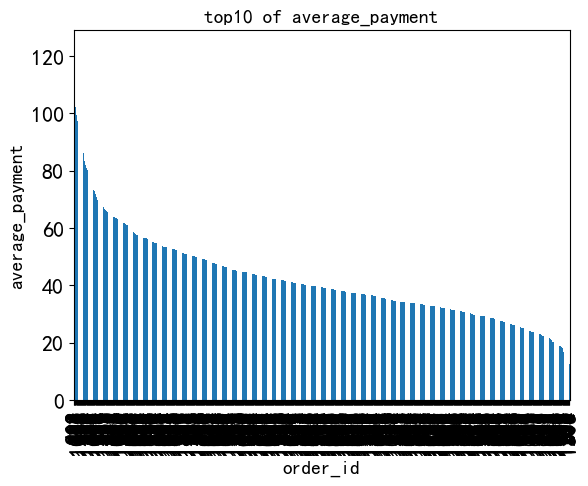

In [9]:
#订单消费单价 保留两位数
Group_sum['Average'] = Group_sum['total_amounts']/Group_sum['counts']

sort_average = Group_sum.sort_values(by = 'Average',ascending = False) [:]#第100到第500
print(round(sort_average,2))
sort_average['Average'].plot(kind = 'bar',fontsize=16)

plt.title('top10 of average_payment',fontsize=14)
plt.xlabel('order_id',fontsize=14)
plt.ylabel('average_payment',fontsize=14)

In [10]:
#日期与时间维度进行点菜量的分析

Text(0.5, 1.0, 'the relationship bettween hour and count')

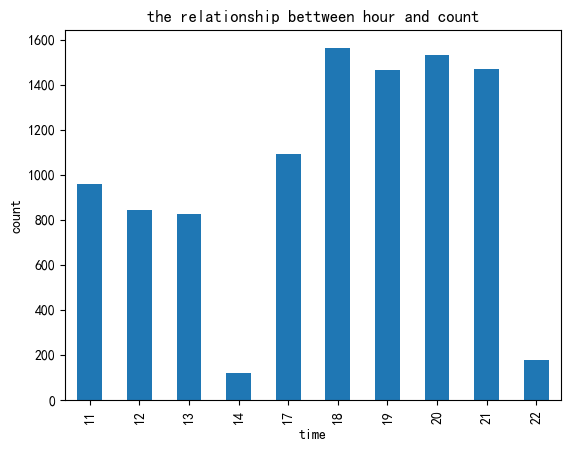

In [11]:
#一天什么时间段，点菜量比较集中
data['hour_count'] = 1 #定义一个新的数据链用于计数
data['time'] = pd.to_datetime(data['place_order_time'])#将时间转换成日期类型  并存储

data['hour'] =data['time'].map(lambda x:x.hour) #将时间转换为小时

gp_by_hour = data.groupby('hour').count()['hour_count']
gp_by_hour.plot( kind = 'bar')


plt.xlabel ('time')
plt.ylabel ('count')
plt.title ('the relationship bettween hour and count')

Text(0.5, 1.0, 'each day order number')

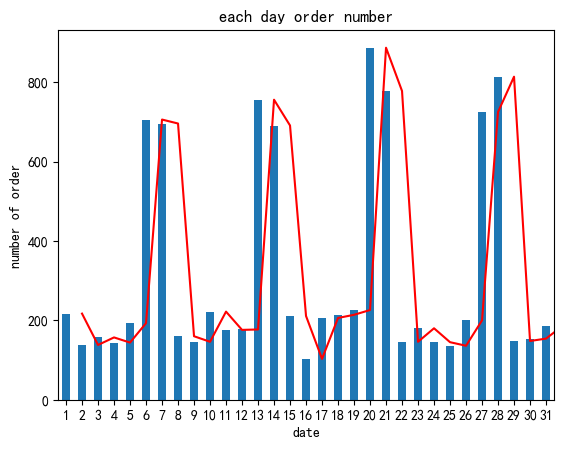

In [12]:
#哪一天订餐数量最多
data['day_count'] = 1
data['day'] = data['time'].map(lambda x:x.day)

gp_by_day = data.groupby('day').count()['day_count']
gp_by_day.plot(kind = 'bar')
gp_by_day.plot(kind = 'line',color = 'r')
plt.xlabel ('date')
plt.ylabel ('number of order')
plt.title  ('each day order number')

Text(0.5, 1.0, 'each weekday order number')

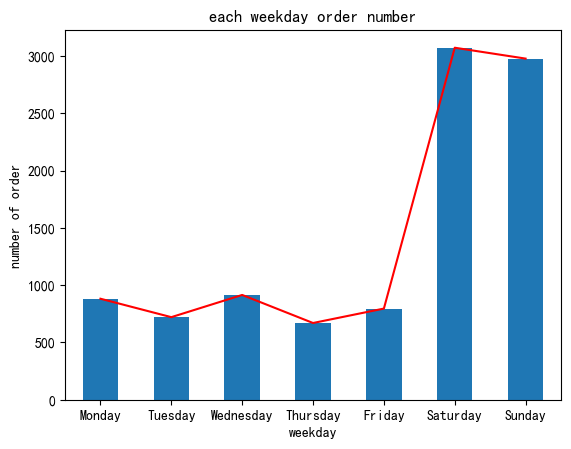

In [13]:
#哪周订单多
data['weekday_count'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday())

gp_by_weekday = data.groupby('weekday').count()['weekday_count']

gp_by_weekday.plot(kind = 'bar')
gp_by_weekday.plot(kind = 'line',color = 'r')

x_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(range(7),x_labels)

plt.xlabel ('weekday')
plt.ylabel ('number of order')
plt.title  ('each weekday order number')
